Ana Lyons
101

# Homework 5: Statistics, Fitting

##### ** Submit this notebook to bourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Homework05.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident. You may also recognize this dataset from Homework04. That's not an accident either.]

You are given a dataset (peak.dat) from a gamma-ray experiment consisting of ~1000 hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray. We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Fit the distribution to a Gaussian function using an unbinned fit (<i>Hint:</i> use <tt>scipi.stats.norm.fit()</tt> function, see for example Lecture05.ipynb), and compare the parameters of the fitted Gaussian with the mean and standard deviation computed in Homework04
1. Fit the distribution to a Gaussian function using a binned least-squares fit (<i>Hint:</i> use <tt>scipy.optimize.curve_fit()</tt> function, see Lecture05.ipynb for example), and compare the parameters of the fitted Gaussian and their uncertainties to the parameters obtained in the unbinned fit above. 
1. Re-make your histogram from (1) with twice as many bins, and repeat the binned least-squares fit from (3) on the new histogram. How sensitive are your results to binning ? 
1. How consistent is the distribution with a Gaussian? In other words, compare the histogram from (1) to the fitted curve, and compute a goodness-of-fit value, such as $\chi^2$/d.f.


Unbinned Fit: 
mean: 1.202680265 
standard deviation: 0.1037851246060088

Least-Squares Fit: 
mean: 1.203947914718745
uncertainty on the mean: 0.0026901562809740487
sigma: 0.10293694137484309
uncertainty on sigma: 0.0019189792903513264

Least-Squares with 2x Bins: 
mean: 1.2026619567674437
uncertainty on the mean: 0.0027984127198136545
sigma: 0.10276636446694398
uncertainty on sigma: 0.0020965993266445567
The fit doesn't seem to be very sensitive to binning, because the fit and the uncertainties don't change very much when the bin size doubles.

chi^2 = 74.11
chi^2/d.f.= 4.36


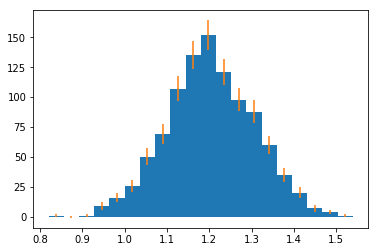

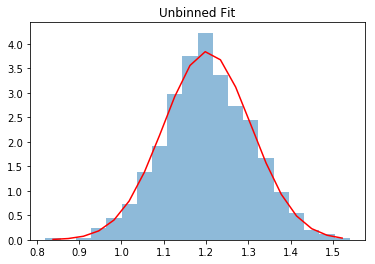

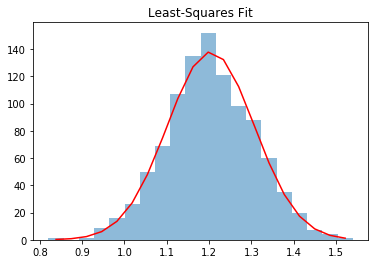

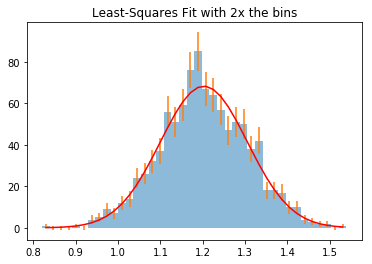

In [120]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

data = np.loadtxt('peak.dat')
y, bins, patches = plt.hist(data, 20)

#creating a list of the error for each bin count
error = []
for val in y:
    if val == 0:
        err = 1   
    else:
        err = np.sqrt(val)
    error.append(err)

#creating a list of the bin centers
bin_centers = []
for n in range(0, 20):
    bin_center = (bins[n+1] + bins[n])/2
    bin_centers.append(bin_center)
    
plt.errorbar(bin_centers, y, yerr=error, linestyle = 'None')

#finding the unbinned fit
par = sp.stats.norm.fit(data)
fit = sp.stats.norm.pdf(bin_centers,loc=par[0],scale=par[1])

#plotting the unbinned fit over the data
plt.figure()
plt.hist(data, 20, density=1, alpha=0.5)
plt.plot(bin_centers, fit, 'r-')
plt.title('Unbinned Fit')

print('Unbinned Fit:', '\nmean:', par[0],'\nstandard deviation:', par[1])

#least squares fit
#defining the model
def model(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

#finding and unpacking the parameters
par0 = np.array([sp.mean(data), np.std(data), 1])
par, cov = fitter.curve_fit(model, bin_centers, y, par0, error)

mu = par[0]
sigma = par[1]
A = par[2]
mu_err = cov[0,0]
sigma_err = cov[1,1]

plt.figure()
plt.hist(data, 20, alpha=0.5)
plt.plot(bin_centers, model(bin_centers, mu, sigma, A), 'r-')
plt.title('Least-Squares Fit')

print('\nLeast-Squares Fit:', '\nmean: {}\nuncertainty on the mean: {}\nsigma: {}\nuncertainty on sigma: {}'.format(mu, np.sqrt(mu_err), sigma, np.sqrt(sigma_err)))

#new fit but with twice as many bins
#plotting
plt.figure()
y1, bins1, patches1 = plt.hist(data, 40, alpha=0.5)

#finding error per bin
error1 = []
for val in y1:
    if val == 0:
        err = 1   
    else:
        err = np.sqrt(val)
    error1.append(err)

#creating a list of the bin centers
bin_centers1 = []
for n in range(0, 40):
    bin_center1 = (bins1[n+1] + bins1[n])/2
    bin_centers1.append(bin_center1)
    
plt.errorbar(bin_centers1, y1, yerr=error1, linestyle = 'None')

#finding the least-squares fit
par1, cov1 = fitter.curve_fit(model, bin_centers1, y1, par0, error1)

mu1 = par1[0]
sigma1 = par1[1]
A1 = par1[2]
mu_V = cov1[0,0]
sigma_V = cov1[1,1]

plt.plot(bin_centers1, model(bin_centers1, mu1, sigma1, A1), 'r-')
plt.title('Least-Squares Fit with 2x the bins')
print('\nLeast-Squares with 2x Bins:','\nmean: {}\nuncertainty on the mean: {}\nsigma: {}\nuncertainty on sigma: {}'.format(mu1, np.sqrt(mu_V), sigma1, np.sqrt(sigma_V)))
print("The fit doesn't seem to be very sensitive to binning, because the fit and the uncertainties don't change very much when the bin size doubles.")

#comparing the fit to a Gaussian (chi-squared)
pdf_fitted = model(bin_centers, mu, sigma, A)
chi_squared = np.sum((pdf_fitted-y)**2/np.array(error))
reduced_chi_squared = (chi_squared)/(len(bin_centers)-len(par))
print ('\nchi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))




## Problem 2: Optical Pumping experiment

One of the experiments in the 111B (111-ADV) lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.
1. From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


Reduced Chi-Squared: 1.5179918414918447
P-value, assuming an uncertainty of 0.01 MHz:  0.998878199469632
From this p-value and chi-squared, we can say that the uncertainty we assumed gives a very good fit.

New Reduced Chi-Squared: 0.015179918414918444
New p-value: 0.9999999999997914
Even though the p-value is very high, the chi-squared is too low. This indicates that the error is probably too high.

estimated uncertainty on the slope: 0.014857121097628632
estimated uncertainty on the intercept: 0.01839215351027589

unweighted slope: 3.0540209832022516 
unweighted intercept:  0.039743583467354876

weighted slope: 2.990538584320312 
weighted intercept: 0.08916668283547273


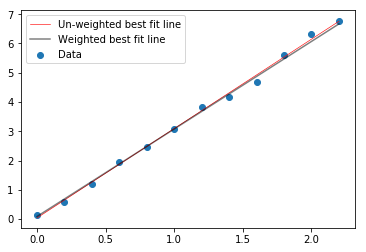

In [124]:
#storing data in arrays
I = np.linspace(0.0, 2.2, 12)
f = np.array([0.14, 0.60, 1.21, 1.94, 2.47, 3.07, 3.83, 4.16, 4.68, 5.60, 6.31, 6.78])

#plotting and finding best fit
plt.scatter(I, f)
def model_linear(x, m, b):
    return x*m + b

par0 = np.array([3, 0])
par, cov = fitter.curve_fit(model_linear, I, f, par0)
m = par[0]
b = par[1]
plt.plot(I, model_linear(I, m, b), 'r', linewidth=0.6)

model = model_linear(I, m, b)
h_list = []
for i in range(0, 12):
    h = model[i]-f[i]
    h_list.append(h)

sigma_assumed = 0.01
chi2 = np.sum((np.array(h_list))**2/sigma_assumed)
chi_reduced = chi2/10
p_value = 1 - sp.stats.chi2.cdf(chi_reduced, 10)
print('Reduced Chi-Squared: {}'.format(chi_reduced))
print('P-value, assuming an uncertainty of 0.01 MHz: ',p_value)
print('From this p-value and chi-squared, we can say that the uncertainty we assumed gives a very good fit.')


chi2_new = np.sum((np.array(h_list))**2)
chi_reduced_new = chi2_new/10
p_value_new = 1 - sp.stats.chi2.cdf(chi_reduced_new, 10)
print('\nNew Reduced Chi-Squared: {}'.format(chi_reduced_new))
print('New p-value:', p_value_new)
print('Even though the p-value is very high, the chi-squared is too low. This indicates that the error is probably too high.')


#finding difference between each data point and fit found in part 1
#and estimating uncertainty in slope and intercept
h_array = np.array(h_list)
error1 = abs(h_array)
par_est, cov_est = fitter.curve_fit(model_linear, I, f, par, error1)
sigma_m = cov_est[0,0]
sigma_b = cov_est[1,1]

print('\nestimated uncertainty on the slope: {}'.format(np.sqrt(sigma_m)))
print('estimated uncertainty on the intercept: {}'.format(np.sqrt(sigma_b)))

#weighted least-squares fit on the data
sigma = 0.03+0.03*f
par_weighted, cov_weighted = fitter.curve_fit(model_linear, I, f, par0, sigma)
plt.plot(I, model_linear(I, par_weighted[0], par_weighted[1]), 'k-',alpha = 0.5)
plt.legend(['Un-weighted best fit line', 'Weighted best fit line', 'Data'])

print('\nunweighted slope:', m, '\nunweighted intercept: ', b)
print('\nweighted slope: {} \nweighted intercept: {}'.format(par_weighted[0], par_weighted[1]))
